#  Проект: Выявление потенциально прибыльных игр

Цель исследования: Выявить определяющие успешность игры закономерности, потенциально популярный продукт и спланировать рекламные кампании.

**План работ:**

**1 Подготовка данных**
- Замена названий столбцов
- Обработка пропусков
- Обработка дубликатов
- Обработка типов данных
- Рассчет суммарных продаж по регионам

**2 Исследовательский анализ данных**
- Количество игр в разные годы
- Продажи по платформам
- Определение актуальных данных для прогноза на 2017 год
- Выявление потенциально прибыльных платформ
- Диаграмма размаха продаж игр по платформам
- Влияние отзывов
- Сравнение платформ
- Самые прибыльные жанры

**3 Портрет  пользователя для регионов**
- Самые популярные платформы
- Самые популярные жанры
- Влияние рейтинга ESRB

**4 Проверка гипотез**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

**5 Общий вывод**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import numpy as np

**Исходные данные**

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датасет содержит названия игр, платформ, год выпуска, жанр, продажи по регионам, оценки и рейтинги.

Так же множество пропусков в столбцах Critic_Score, User_Score, Rating.

## Подготовка данных

### Замена названий столбцов

In [6]:
data.columns = data.columns.str.lower()

### Обработка пропусков

In [7]:
data[data['year_of_release'].isna()]['name'].count()/data['year_of_release'].shape[0]*100

1.609332934489979

In [8]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В датасете есть 2 строки с пропусками в столбцах name и genre - так же пропуски в оценках и рейтинге: удалим эти строки. 

Пропуски в столбце year_of_release составляют 1.61% от всего датасета - поскольку для большинства исследований понадобится год выпуска игры - удалим эти пропуски.

Пропуски в столбце rating объясняются тем, что рейтинг ESRB присваивается не всем играм. Например играм нацеленым на определенную аудиторию в странах не использующих рейтинг ESRB.

In [9]:
data= data.dropna(subset=['name', 'year_of_release'])

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено)

In [10]:
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)
data['user_score'] = data['user_score'].replace('tbd','0')
data['rating'] = data['rating'].fillna('-')

При дальнейшей обработке данных следует отсеивать эти данные

### Обработка типов данных

In [11]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['genre'] = data['genre'].astype('category')
data['user_score'] = data['user_score'].astype('float')
data['rating'] = data['rating'].astype('category')

### Обработка дубликатов

In [12]:
data.duplicated().sum()

0

In [13]:
data.duplicated(subset=['name', 'platform']).sum()

3

Удалим неявные дубликаты

In [14]:
data = data.drop_duplicates(subset=['name', 'platform'], keep='first')

### Рассчет суммарных продаж по регионам

Посчитаем суммарные продажи сложив продажи по всем регионам

In [15]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

## Исследовательский анализ данных

### Количество игр в разные годы

In [16]:
for year in data['year_of_release'].sort_values().unique():
    print('В', year, 'году было выпущено ', end='')
    print(data[data['year_of_release']==year].shape[0], 'игр')

В 1980 году было выпущено 9 игр
В 1981 году было выпущено 46 игр
В 1982 году было выпущено 36 игр
В 1983 году было выпущено 17 игр
В 1984 году было выпущено 14 игр
В 1985 году было выпущено 14 игр
В 1986 году было выпущено 21 игр
В 1987 году было выпущено 16 игр
В 1988 году было выпущено 15 игр
В 1989 году было выпущено 17 игр
В 1990 году было выпущено 16 игр
В 1991 году было выпущено 41 игр
В 1992 году было выпущено 43 игр
В 1993 году было выпущено 60 игр
В 1994 году было выпущено 121 игр
В 1995 году было выпущено 219 игр
В 1996 году было выпущено 263 игр
В 1997 году было выпущено 289 игр
В 1998 году было выпущено 379 игр
В 1999 году было выпущено 338 игр
В 2000 году было выпущено 350 игр
В 2001 году было выпущено 482 игр
В 2002 году было выпущено 829 игр
В 2003 году было выпущено 775 игр
В 2004 году было выпущено 762 игр
В 2005 году было выпущено 938 игр
В 2006 году было выпущено 1006 игр
В 2007 году было выпущено 1197 игр
В 2008 году было выпущено 1427 игр
В 2009 году было выпущено 

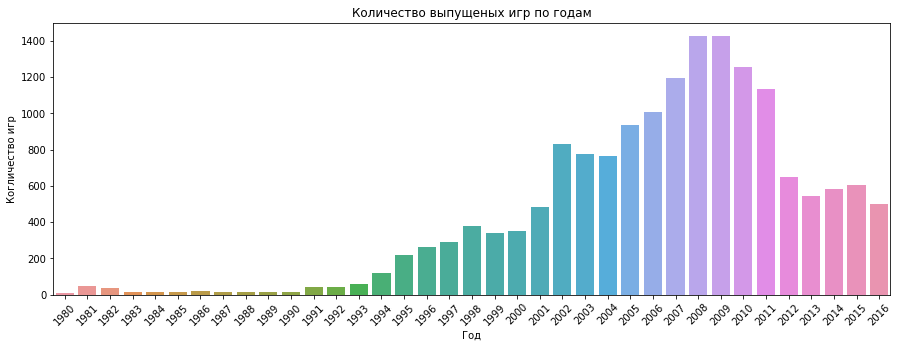

In [56]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.countplot(data=data, x='year_of_release')
plt.title('Количество выпущеных игр по годам')
plt.xlabel('Год')
plt.ylabel('Когличество игр');

До 1994 года выходило менее 100 игр в год, с 2006 по 2011 - более 1000 игр. С 2012 по 2016 год число вышедших игр снизилось почти в 2 раза. Будем считать эти данные актуальнымы для прогноза на 2017 год.

### Продажи по платформам

In [18]:
for year in data['year_of_release'].sort_values().unique():
    max_sales = 0
    max_platform = ''
    for platform in data['platform'].sort_values().unique():
        if data[(data['year_of_release']==year)&(data['platform']==platform)]['total_sales'].sum() > max_sales:
            max_sales = data[(data['year_of_release']==year)&(data['platform']==platform)]['total_sales'].sum()
            max_platform = platform
    print('В', year, 'году больше всего продаж на платформе', max_platform, ':', max_sales.round(2))

В 1980 году больше всего продаж на платформе 2600 : 11.38
В 1981 году больше всего продаж на платформе 2600 : 35.68
В 1982 году больше всего продаж на платформе 2600 : 28.88
В 1983 году больше всего продаж на платформе NES : 10.96
В 1984 году больше всего продаж на платформе NES : 50.08
В 1985 году больше всего продаж на платформе NES : 53.44
В 1986 году больше всего продаж на платформе NES : 36.41
В 1987 году больше всего продаж на платформе NES : 19.76
В 1988 году больше всего продаж на платформе NES : 45.01
В 1989 году больше всего продаж на платформе GB : 64.97
В 1990 году больше всего продаж на платформе SNES : 26.15
В 1991 году больше всего продаж на платформе SNES : 16.22
В 1992 году больше всего продаж на платформе SNES : 32.98
В 1993 году больше всего продаж на платформе SNES : 40.02
В 1994 году больше всего продаж на платформе SNES : 35.08
В 1995 году больше всего продаж на платформе PS : 35.96
В 1996 году больше всего продаж на платформе PS : 94.7
В 1997 году больше всего пр

Лидерство в суммарных продажах в обычно длится от 3 до 6 лет. Встречаются платформы которые лидируют всего 1 год - GB и X360

### Определение актуальных данных для прогноза на 2017 год

Отсеем данные до 2012 года

In [19]:
actual_data = data[data['year_of_release']>=2012]

### Выявление потенциально прибыльных платформ

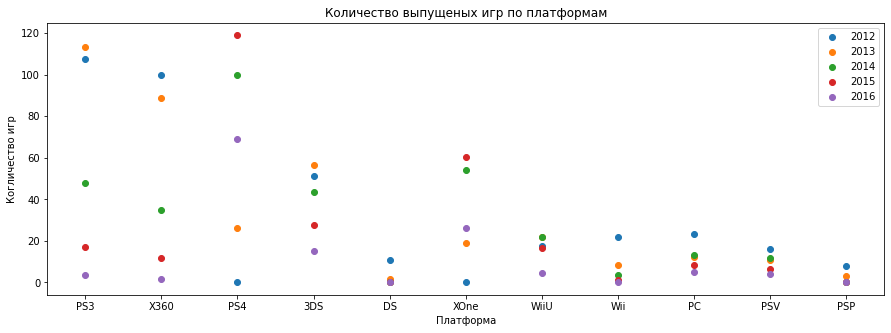

In [57]:
x=actual_data['platform'].unique() #платформы
z=actual_data['year_of_release'].sort_values().unique() #года
plt.figure(figsize=(15,5))
for j in range(len(z)):
    y=[]
    for i in range(len(x)):
        y.append(actual_data[(actual_data['platform']==x[i])&(actual_data['year_of_release']==z[j])]['total_sales'].sum())
        # сумма продаж платформ в год
    plt.scatter(x=x, y=y)
plt.title('Количество выпущеных игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Когличество игр')
plt.legend(z)
plt.show;

Большее количество продаж за последние годы среди PS3, X360, PS4, 3DS, XOne. 

За 2015 и 2016 годы показатели продаж всех платорм, кроме PS4 и XOne, являются наименьшими за последние годы.

Так же следует отметить, что если исключить PS4 и Xone, показатели продаж платрформ 3DS и PC выглядят стабильными, учитывая спад плодаж на всех платформах.

PSV - потенциально прибыльная платформа, поскольку является новой версией моделей PS - лидера по продажам за 2011-2016 годы. 

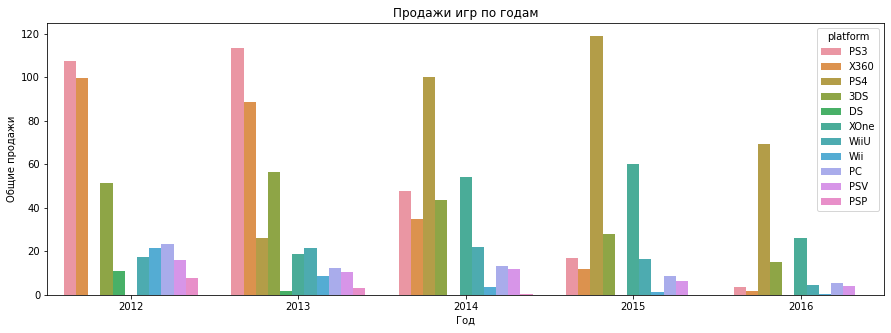

In [58]:
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='year_of_release', y='total_sales', hue='platform', ci=None, estimator=sum)
plt.title('Продажи игр по годам')
plt.xlabel('Год')
plt.ylabel('Общие продажи');

### Диаграмма размаха продаж игр по платформам

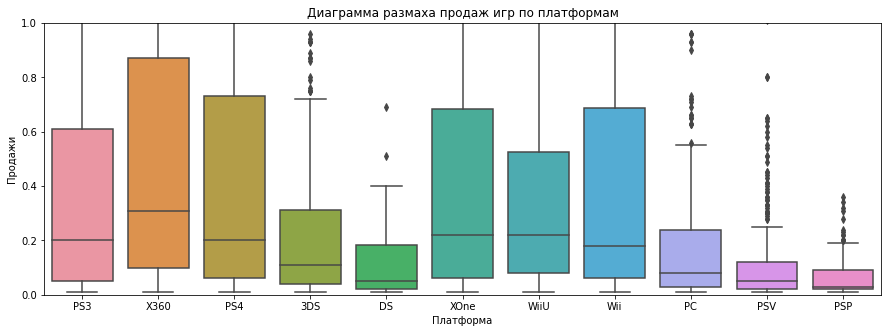

In [61]:
plt.figure(figsize=(15,5))
sns.boxplot(x='platform', y='total_sales', data=actual_data[(actual_data['total_sales']!=0)])
plt.ylim([0,1])
plt.title('Диаграмма размаха продаж игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show;

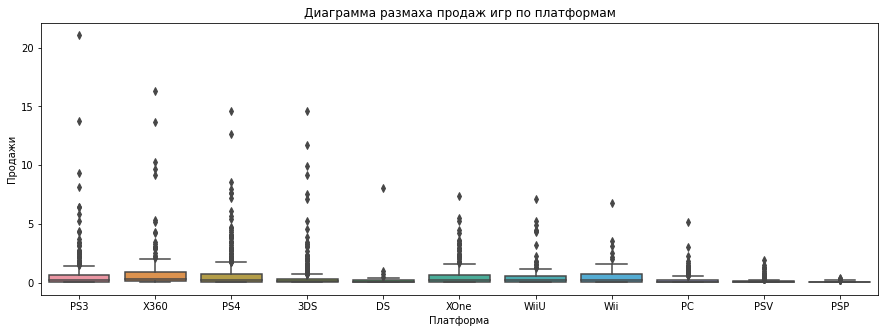

In [60]:
plt.figure(figsize=(15,5))
sns.boxplot(x='platform', y='total_sales', data=actual_data[(actual_data['total_sales']!=0)])
plt.title('Диаграмма размаха продаж игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show;

In [24]:
actual_data[actual_data['platform']=='PS4']['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

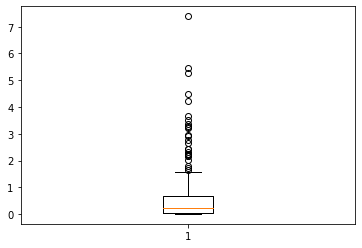

In [25]:
plt.boxplot(x=actual_data[(actual_data['platform']=='XOne')&(actual_data['total_sales']!=0)]['total_sales'])
plt.show;

In [26]:
actual_data[actual_data['platform']=='XOne']['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

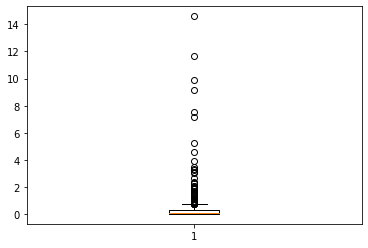

In [27]:
plt.boxplot(x=actual_data[(actual_data['platform']=='3DS')&(actual_data['total_sales']!=0)]['total_sales'])
plt.show;

In [28]:
actual_data[actual_data['platform']=='3DS']['total_sales'].describe()

count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: total_sales, dtype: float64

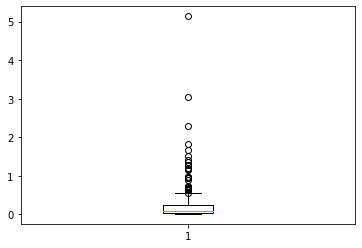

In [29]:
plt.boxplot(x=actual_data[(actual_data['platform']=='PC')&(actual_data['total_sales']!=0)]['total_sales'])
plt.show;

In [30]:
actual_data[actual_data['platform']=='PC']['total_sales'].describe()

count    249.000000
mean       0.251285
std        0.495518
min        0.010000
25%        0.030000
50%        0.080000
75%        0.240000
max        5.140000
Name: total_sales, dtype: float64

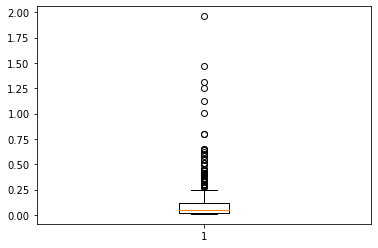

In [31]:
plt.boxplot(x=actual_data[(actual_data['platform']=='PSV')&(actual_data['total_sales']!=0)]['total_sales'])
plt.show;

In [32]:
actual_data[actual_data['platform']=='PSV']['total_sales'].describe()

count    411.000000
mean       0.119659
std        0.203011
min        0.010000
25%        0.020000
50%        0.050000
75%        0.120000
max        1.960000
Name: total_sales, dtype: float64

Снедние значения продаж ближе к третьему квартилю, чем к медиане. Это говорит о том, что большая часть общих продаж приходится на игры с относительно небольшой выручкой, хотя самые популярные игры и имеют большой процент от общих продаж.

### Влияние отзывов

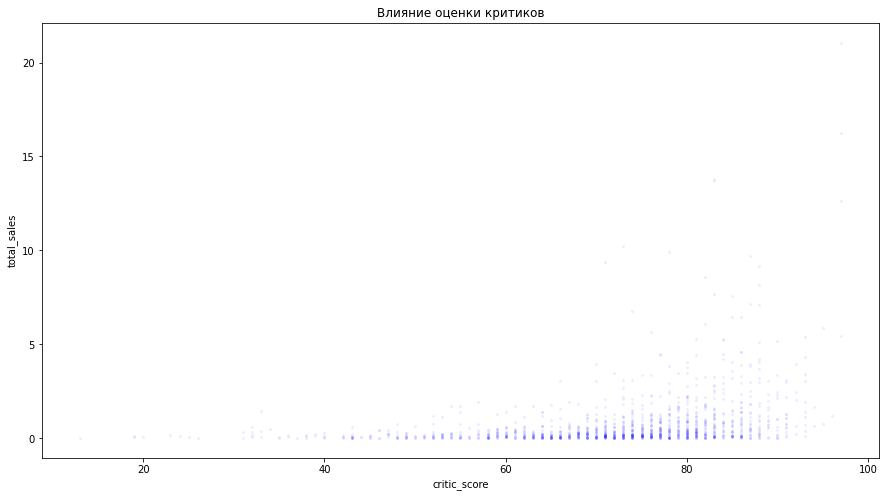

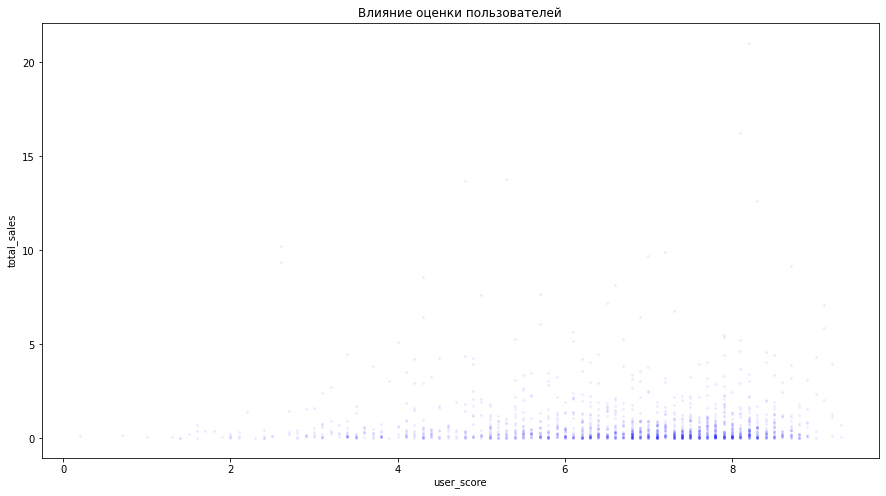

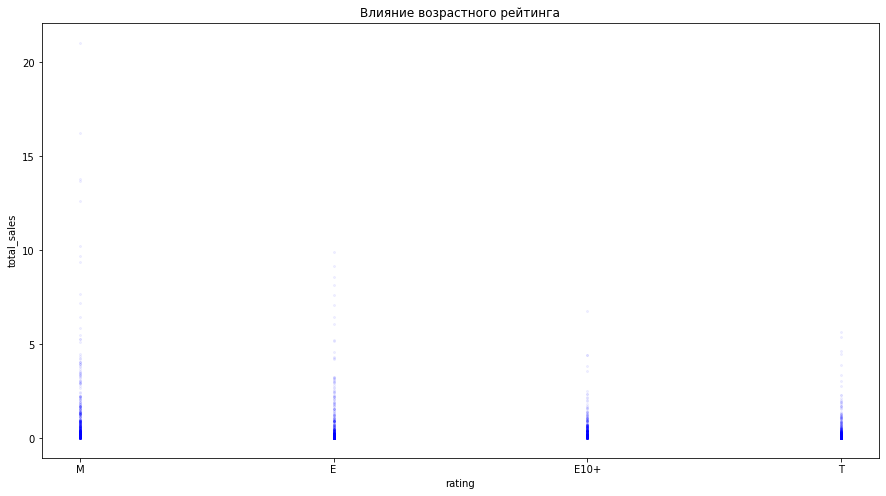

In [33]:
actual_data[actual_data['critic_score'] != 0].plot(kind='scatter', y='total_sales' , x='critic_score', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Влияние оценки критиков')


actual_data[actual_data['user_score'] != 0].plot(kind='scatter', y='total_sales' , x='user_score', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Влияние оценки пользователей')

actual_data[actual_data['rating'] != '-'].plot(kind='scatter', y='total_sales' , x='rating', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Влияние возрастного рейтинга');

**Влияние отзывов по платформам**

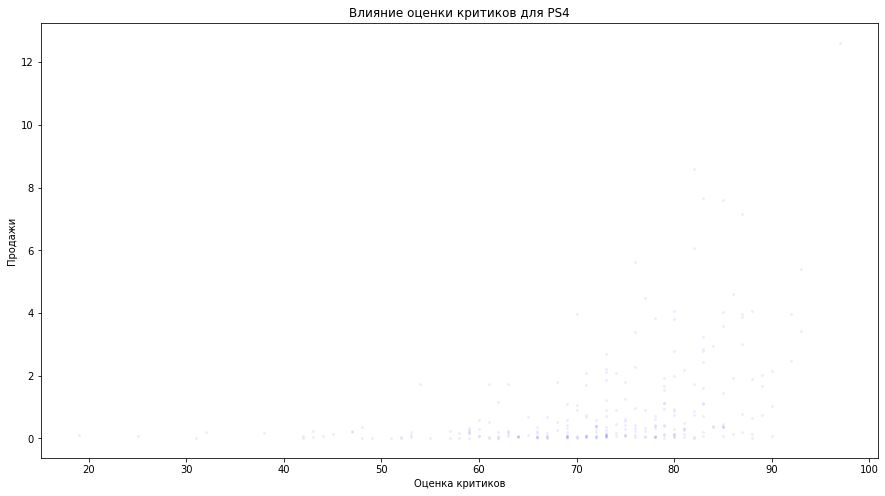

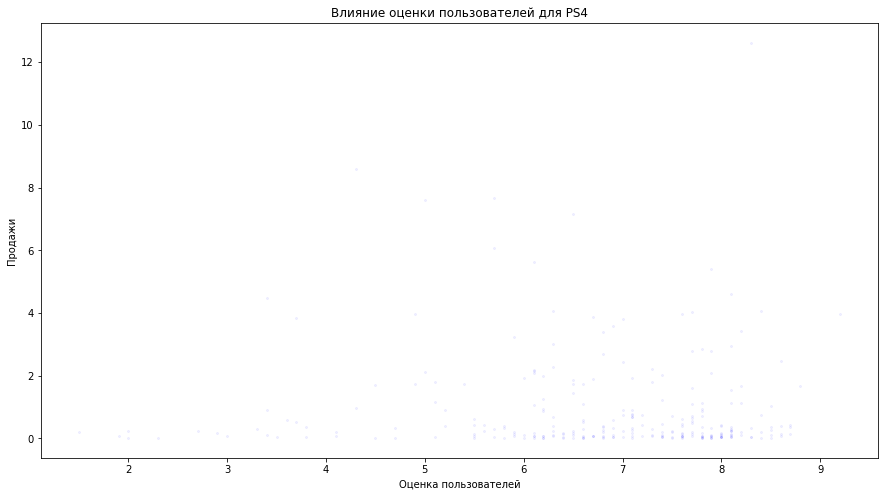

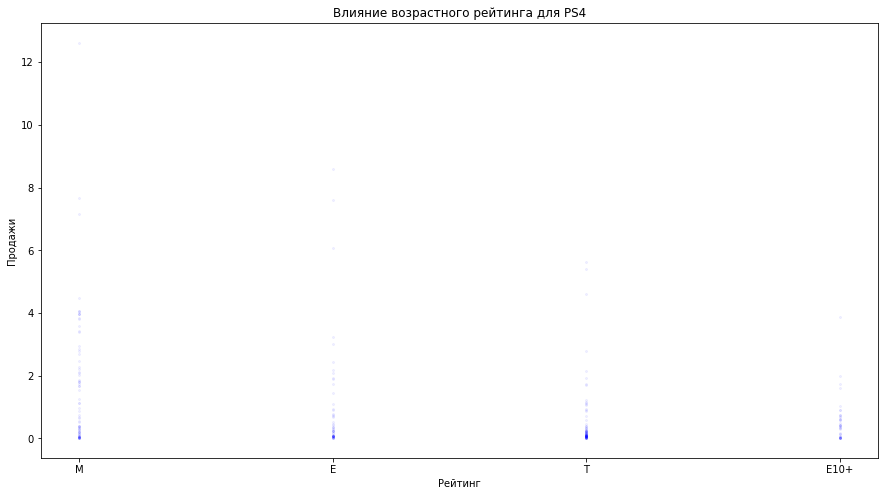

In [63]:
actual_data[(actual_data['platform'] == 'PS4')&(actual_data['critic_score'] != 0)].plot(
    kind='scatter', y='total_sales' , x='critic_score', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценки критиков для PS4')


actual_data[(actual_data['platform'] == 'PS4')&(actual_data['user_score'] != 0)].plot(kind='scatter', y='total_sales' , x='user_score', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценки пользователей для PS4')

actual_data[(actual_data['platform'] == 'PS4')&(actual_data['rating'] != '-')].plot(kind='scatter', y='total_sales' , x='rating', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.title('Влияние возрастного рейтинга для PS4');

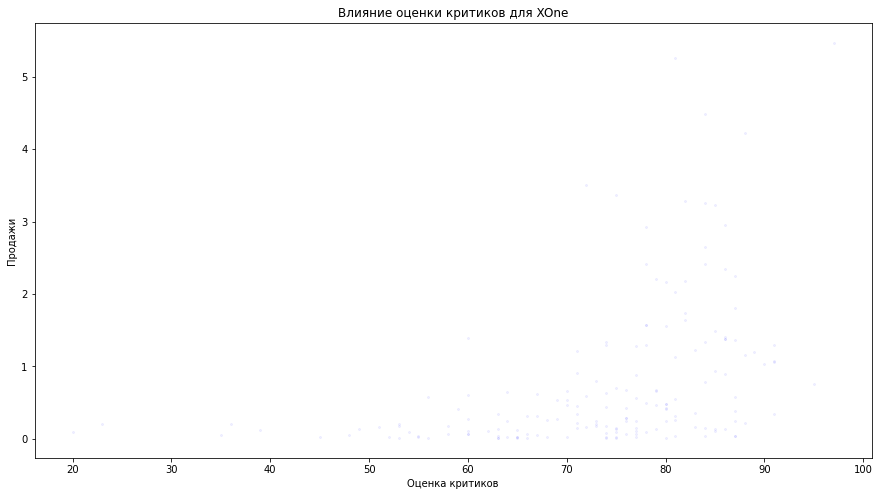

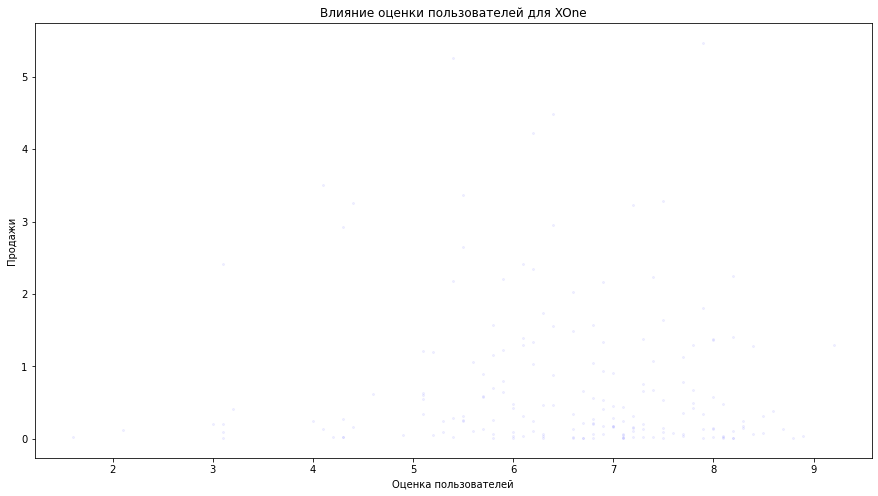

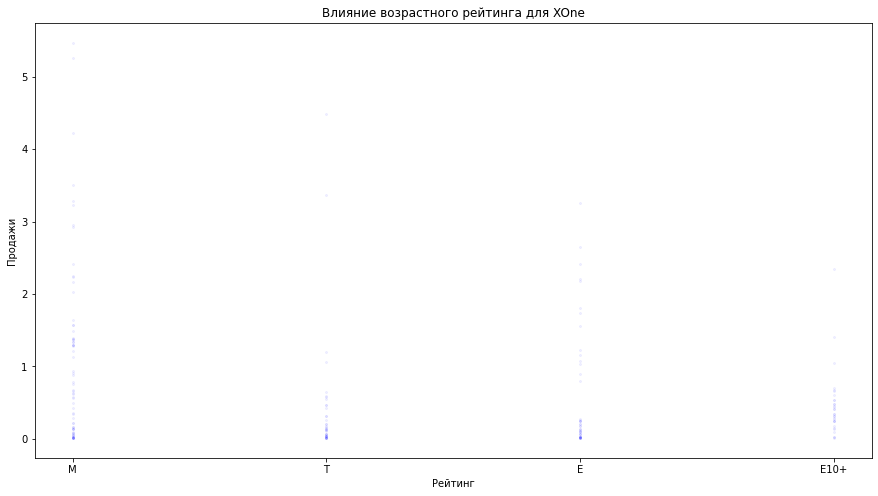

In [64]:
actual_data[(actual_data['platform'] == 'XOne')&(actual_data['critic_score'] != 0)].plot(
    kind='scatter', y='total_sales' , x='critic_score', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценки критиков для XOne')


actual_data[(actual_data['platform'] == 'XOne')&(actual_data['user_score'] != 0)].plot(kind='scatter', y='total_sales' , x='user_score', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценки пользователей для XOne')

actual_data[(actual_data['platform'] == 'XOne')&(actual_data['rating'] != '-')].plot(kind='scatter', y='total_sales' , x='rating', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.title('Влияние возрастного рейтинга для XOne');

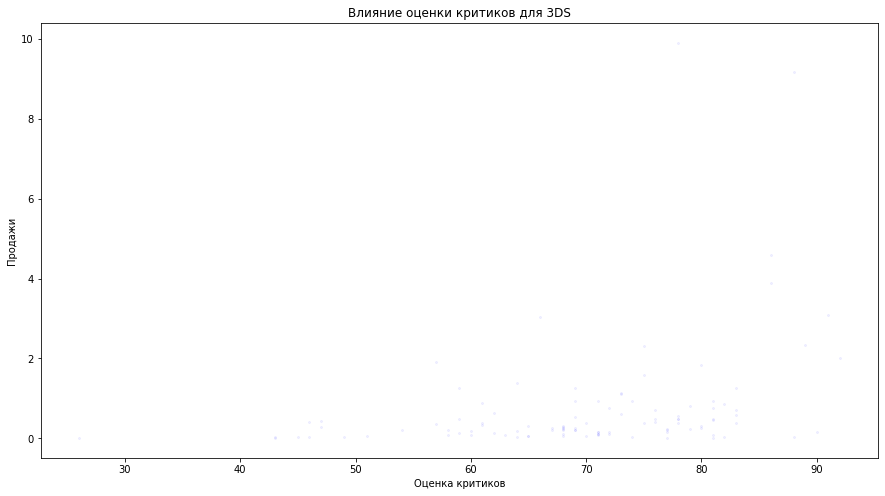

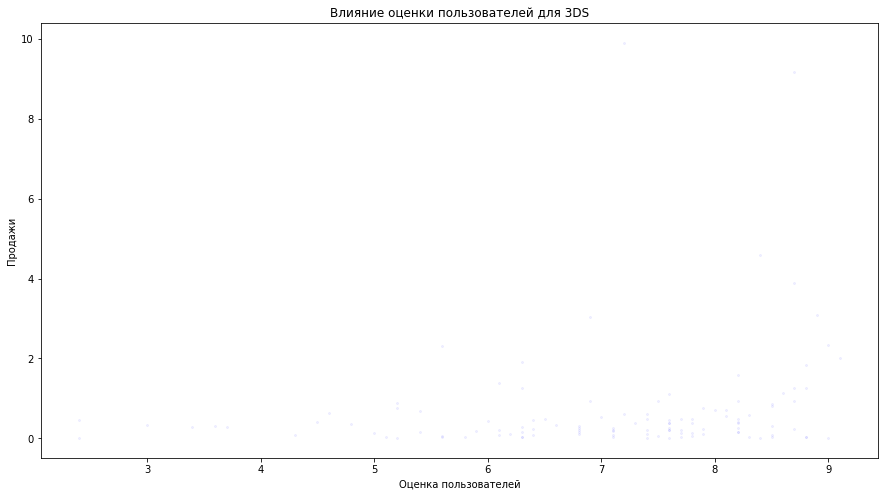

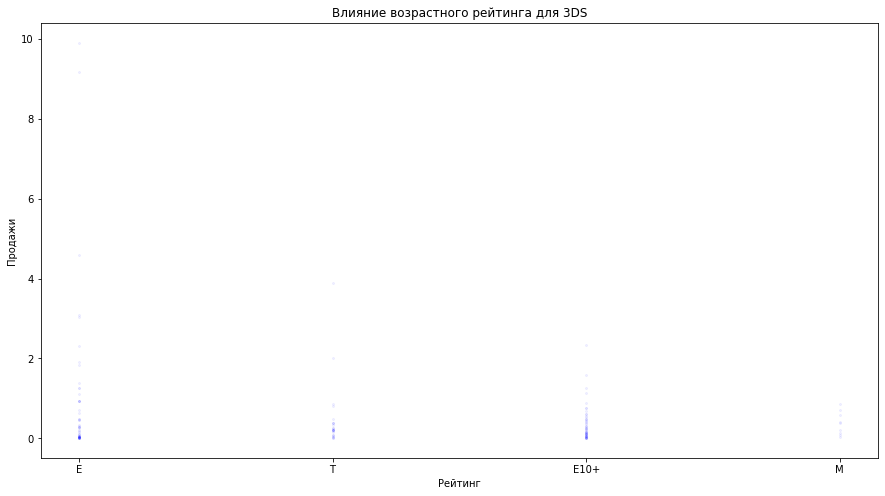

In [65]:
actual_data[(actual_data['platform'] == '3DS')&(actual_data['critic_score'] != 0)].plot(
    kind='scatter', y='total_sales' , x='critic_score', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценки критиков для 3DS')


actual_data[(actual_data['platform'] == '3DS')&(actual_data['user_score'] != 0)].plot(kind='scatter', y='total_sales' , x='user_score', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценки пользователей для 3DS')

actual_data[(actual_data['platform'] == '3DS')&(actual_data['rating'] != '-')].plot(kind='scatter', y='total_sales' , x='rating', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.title('Влияние возрастного рейтинга для 3DS');

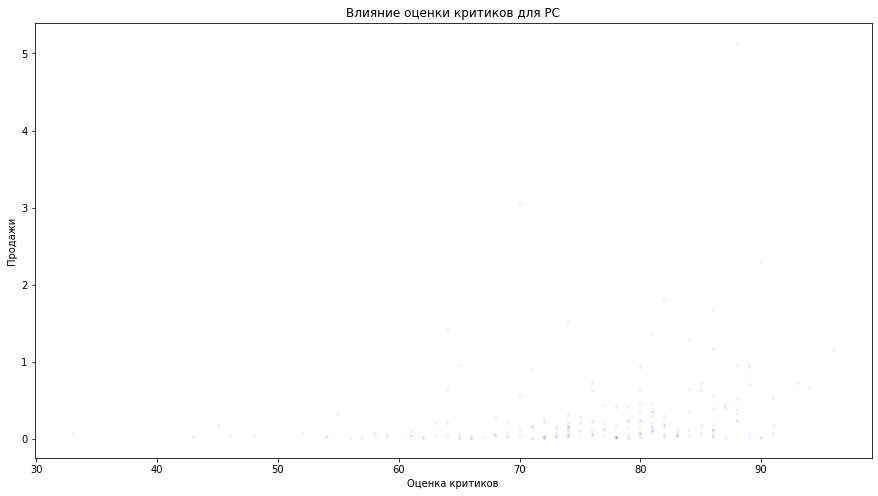

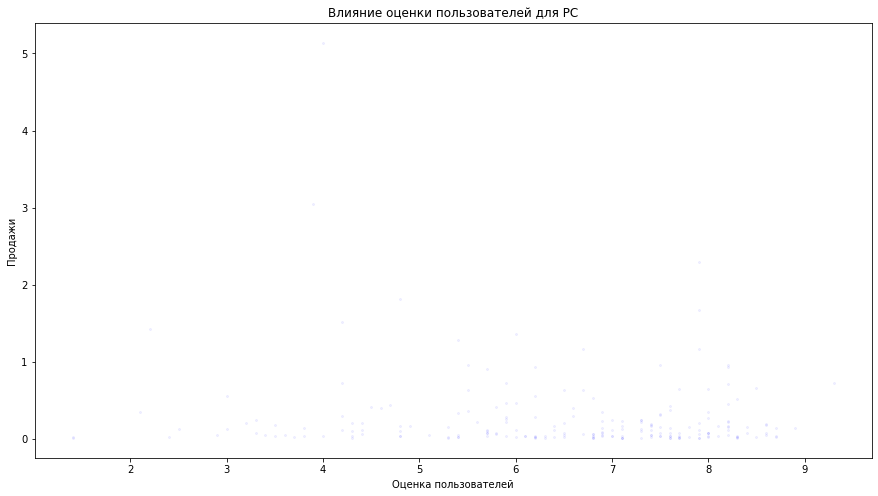

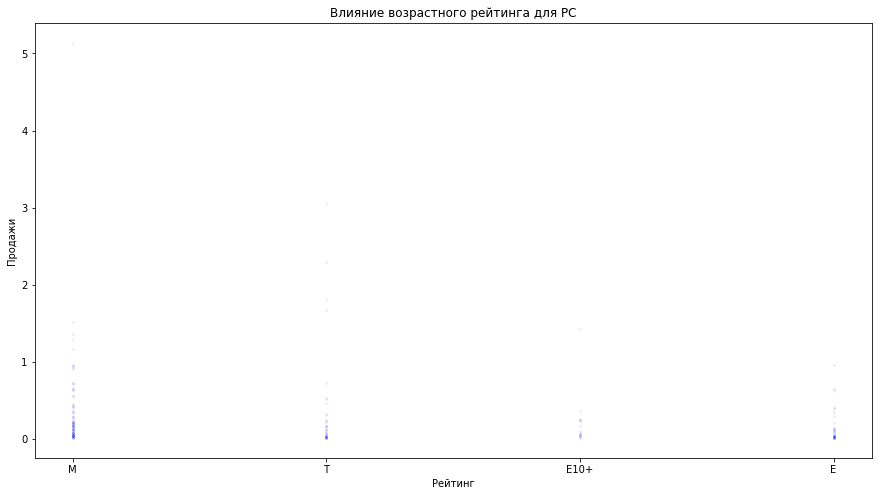

In [66]:
actual_data[(actual_data['platform'] == 'PC')&(actual_data['critic_score'] != 0)].plot(
    kind='scatter', y='total_sales' , x='critic_score', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценки критиков для PC')


actual_data[(actual_data['platform'] == 'PC')&(actual_data['user_score'] != 0)].plot(kind='scatter', y='total_sales' , x='user_score', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценки пользователей для PC')

actual_data[(actual_data['platform'] == 'PC')&(actual_data['rating'] != '-')].plot(kind='scatter', y='total_sales' , x='rating', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.title('Влияние возрастного рейтинга для PC');

In [34]:
print('Корреляция продаж с оценками критиков:', actual_data['total_sales'].corr(actual_data['critic_score']).round(2))
print('Корреляция продаж с оценками пользователей:',actual_data['total_sales'].corr(actual_data['user_score']).round(2))

Корреляция продаж с оценками критиков: 0.25
Корреляция продаж с оценками пользователей: 0.18


Корреляция продаж с оценками критиков: 0.25

Корреляция продаж с оценками пользователей: 0.18

Среди всех игр преобладают игры без возрастного ограничения(E), и с ограничением от 17(M), 13(T) и 10(E10+) лет.

### Сравнение платформ

**Оценки критиков и пользователей**

Text(0, 0.5, 'Платпорма')

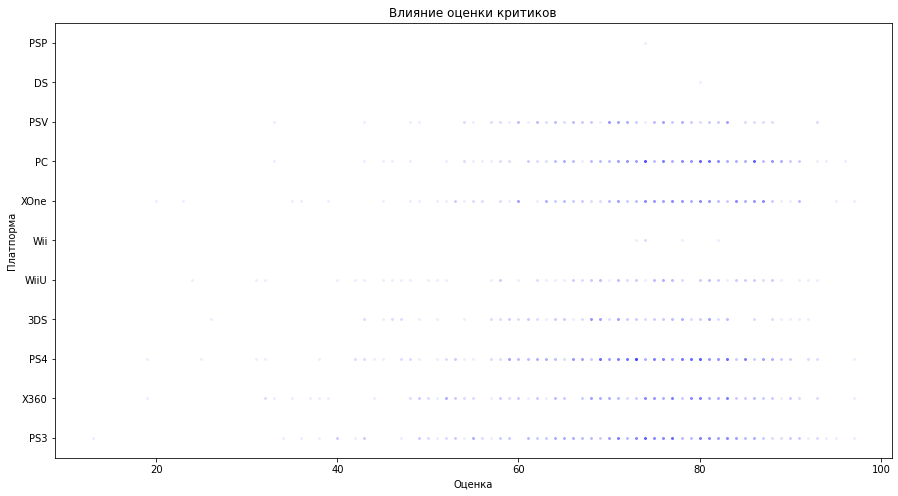

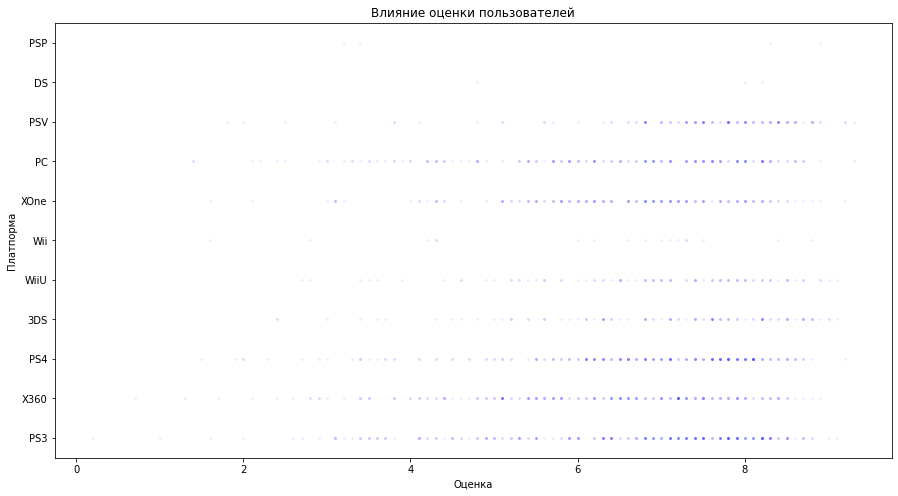

In [83]:
actual_data[actual_data['critic_score'] != 0].plot(kind='scatter', y='platform' , x='critic_score', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Влияние оценки критиков')
plt.xlabel('Оценка')
plt.ylabel('Платпорма')


actual_data[actual_data['user_score'] != 0].plot(kind='scatter', y='platform' , x='user_score', 
                                     alpha=0.05, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Влияние оценки пользователей');
plt.xlabel('Оценка')
plt.ylabel('Платформа')

**Продажи по годам**

Количество игр на платформах по годам

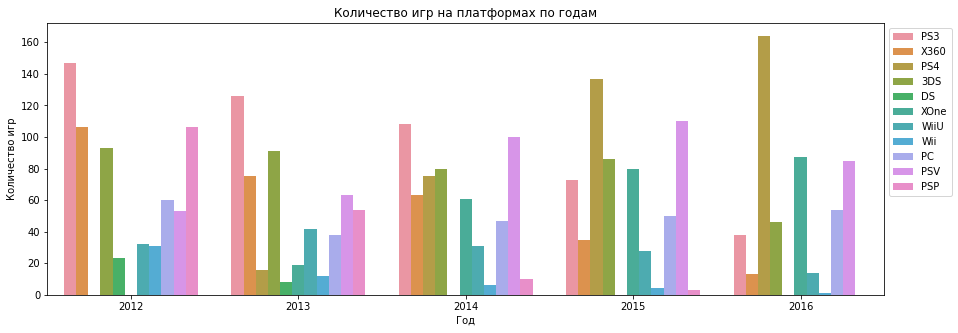

In [84]:
plt.figure(figsize=(15,5))
sns.countplot(data=actual_data, x='year_of_release', hue='platform')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Количество игр на платформах по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр');

Потенциально прибыльные платформы имеют большее количество игр

### Самые прибыльные жанры

Количество игр по жанрам

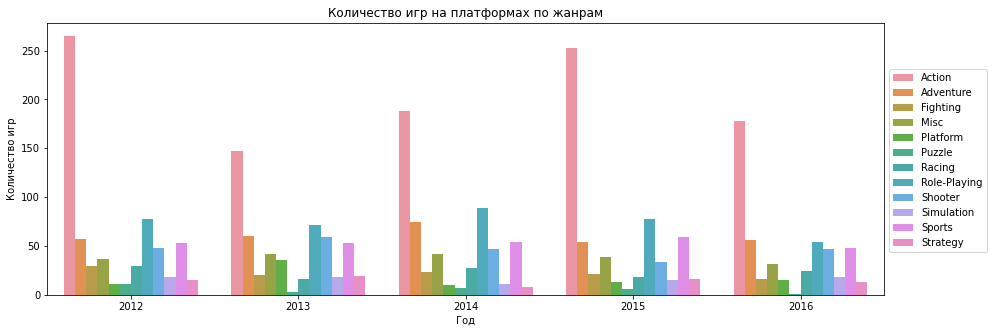

In [85]:
plt.figure(figsize=(15,5))
sns.countplot(data=actual_data, x='year_of_release', hue='genre')
plt.legend(bbox_to_anchor=(1, 0.85))
plt.title('Количество игр на платформах по жанрам')
plt.xlabel('Год')
plt.ylabel('Количество игр');

Сумма продаж по жанрам

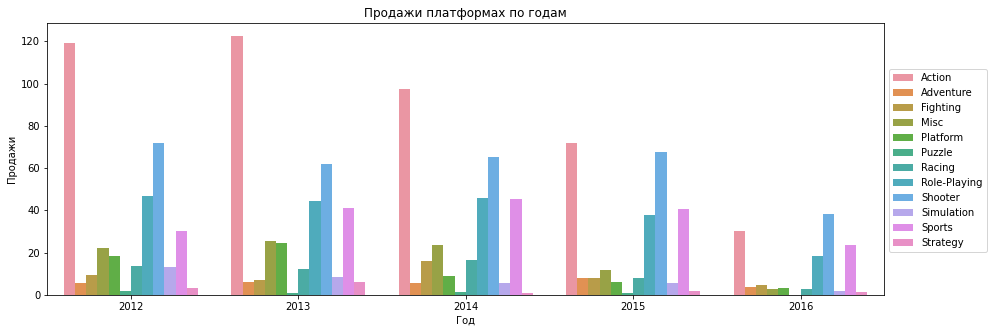

In [86]:
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='year_of_release', y='total_sales', hue='genre', ci=None, estimator=sum)
plt.legend(bbox_to_anchor=(1, 0.85))
plt.title('Продажи платформах по годам')
plt.xlabel('Год')
plt.ylabel('Продажи');

Средняя стоимость игры в жанре

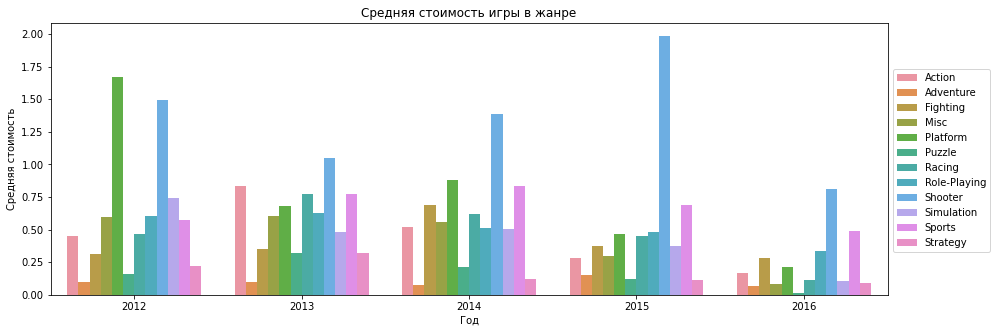

In [87]:
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='year_of_release', y='total_sales', hue='genre', ci=None, estimator=lambda x:sum(x)/len(x))
plt.legend(bbox_to_anchor=(1, 0.85))
plt.title('Средняя стоимость игры в жанре')
plt.xlabel('Год')
plt.ylabel('Средняя стоимость');

Жанр Action имеет большее количество игр и высокий показатель общих продаж, но средняя стоимость одной игры ниже, чем в жанрах Shooter и Sports, так же имеющих высокий показатель общих продаж.

## Портрет пользователя для регионов

### Самые популярные платформы

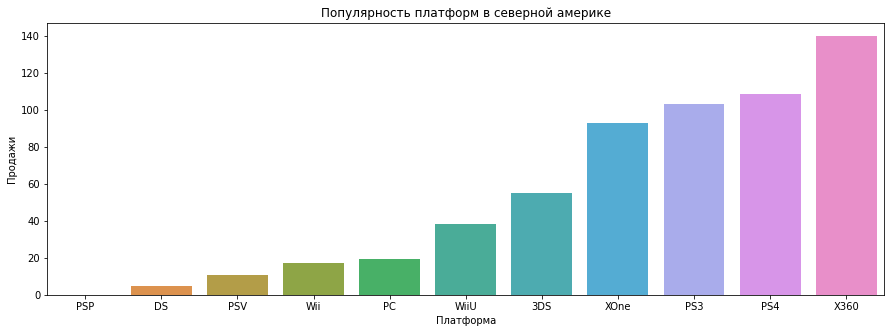

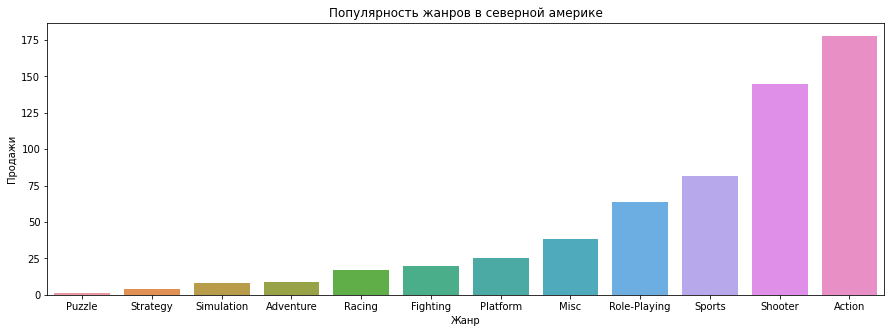

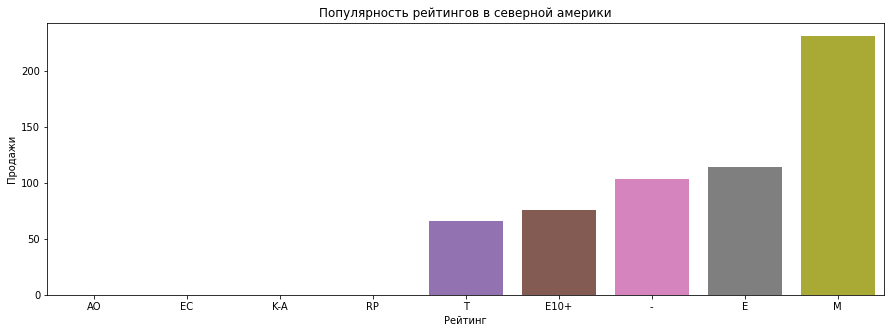

In [91]:
order=actual_data.groupby(['platform'])['na_sales'].sum().sort_values().index
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='platform', y='na_sales', ci=None, estimator=sum, order=order)
plt.title('Популярность платформ в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

order=actual_data.groupby(['genre'])['na_sales'].sum().sort_values().index
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='genre', y='na_sales', ci=None, estimator=sum, order=order)
plt.title('Популярность жанров в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

order=actual_data.groupby(['rating'])['na_sales'].sum().sort_values().index
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='rating', y='na_sales', ci=None, estimator=sum, order=order)
plt.title('Популярность рейтингов в Северной Америки')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи');

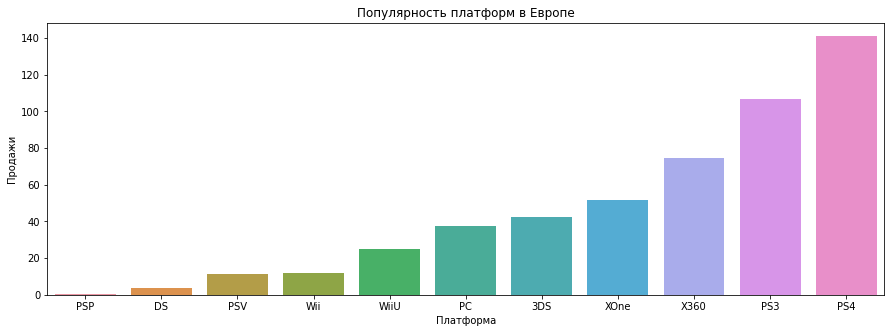

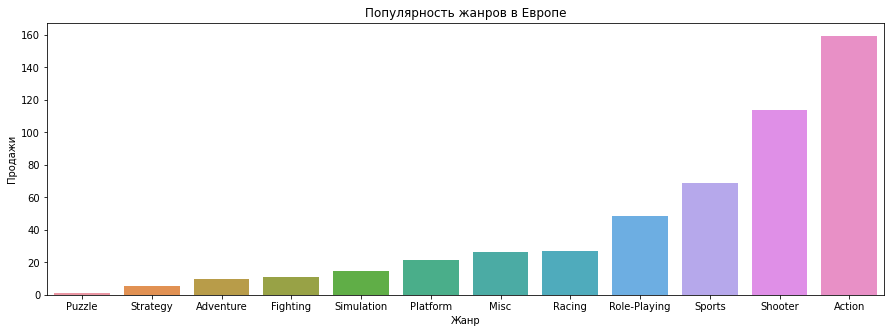

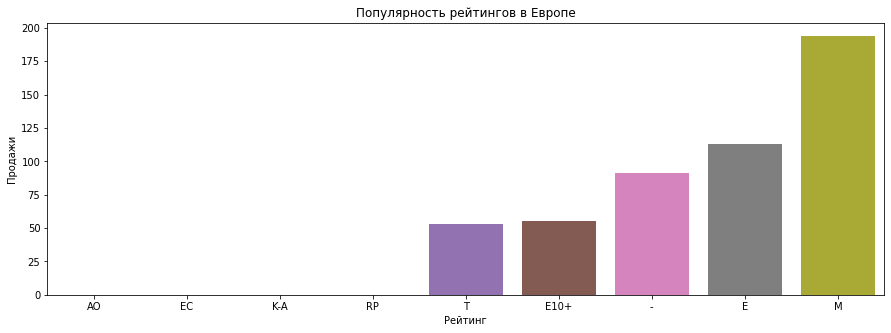

In [97]:
order=actual_data.groupby(['platform'])['eu_sales'].sum().sort_values().index
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='platform', y='eu_sales', ci=None, estimator=sum, order=order)
plt.title('Популярность платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

order=actual_data.groupby(['genre'])['eu_sales'].sum().sort_values().index
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='genre', y='eu_sales', ci=None, estimator=sum, order=order)
plt.title('Популярность жанров в Европе')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

order=actual_data.groupby(['rating'])['eu_sales'].sum().sort_values().index
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='rating', y='eu_sales', ci=None, estimator=sum, order=order)
plt.title('Популярность рейтингов в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи');

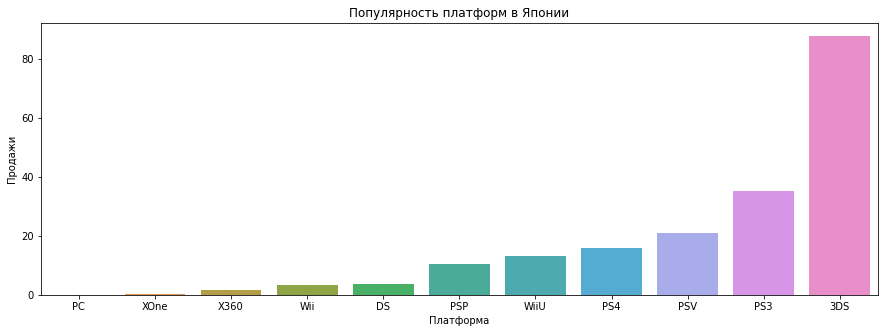

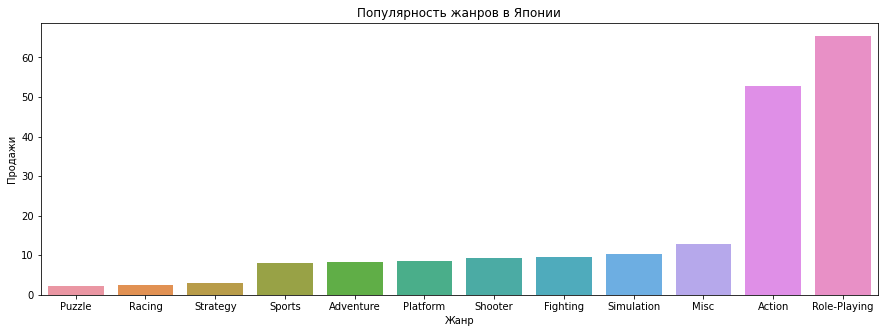

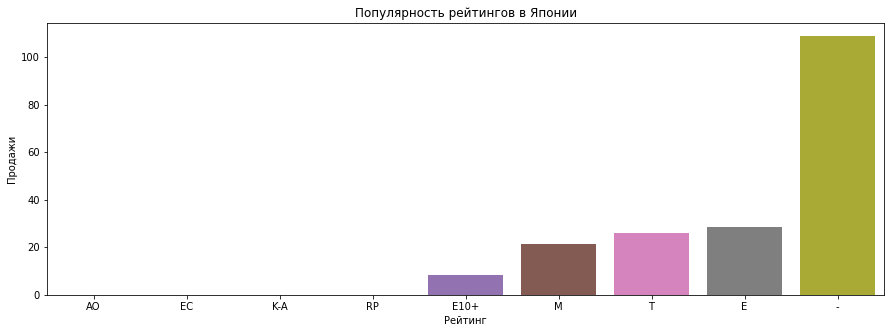

In [96]:
order=actual_data.groupby(['platform'])['jp_sales'].sum().sort_values().index
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='platform', y='jp_sales', ci=None, estimator=sum, order=order)
plt.title('Популярность платформ в Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

order=actual_data.groupby(['genre'])['jp_sales'].sum().sort_values().index
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='genre', y='jp_sales', ci=None, estimator=sum, order=order)
plt.title('Популярность жанров в Японии')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

order=actual_data.groupby(['rating'])['jp_sales'].sum().sort_values().index
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='rating', y='jp_sales', ci=None, estimator=sum, order=order)
plt.title('Популярность рейтингов в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи');

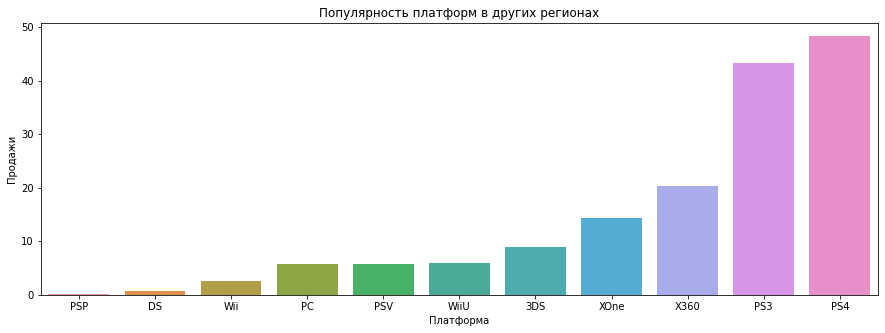

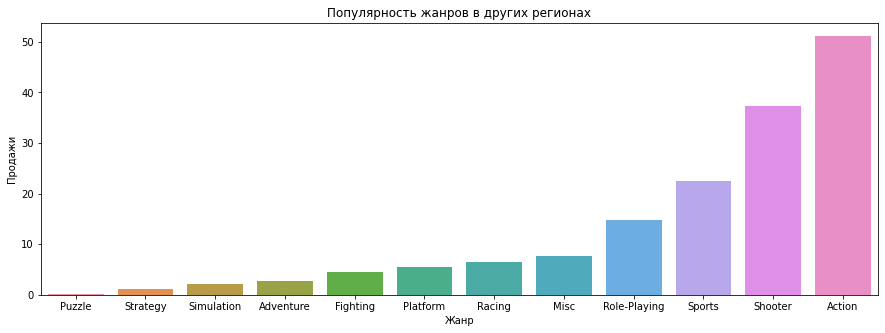

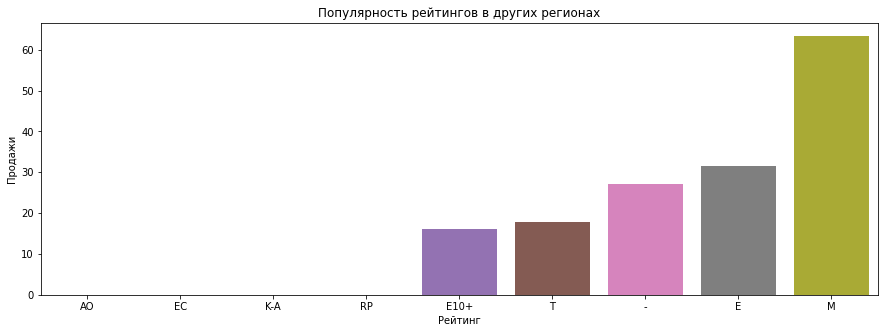

In [98]:
order=actual_data.groupby(['platform'])['other_sales'].sum().sort_values().index
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='platform', y='other_sales', ci=None, estimator=sum, order=order)
plt.title('Популярность платформ в других регионах')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

order=actual_data.groupby(['genre'])['other_sales'].sum().sort_values().index
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='genre', y='other_sales', ci=None, estimator=sum, order=order)
plt.title('Популярность жанров в других регионах')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

order=actual_data.groupby(['rating'])['other_sales'].sum().sort_values().index
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='rating', y='other_sales', ci=None, estimator=sum, order=order)
plt.title('Популярность рейтингов в других регионах')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи');

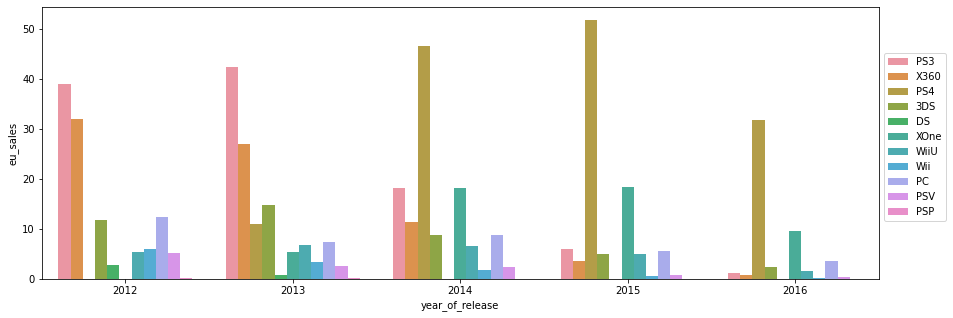

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='year_of_release', y='eu_sales', hue='platform', ci=None, estimator=sum)
plt.legend(bbox_to_anchor=(1, 0.85));

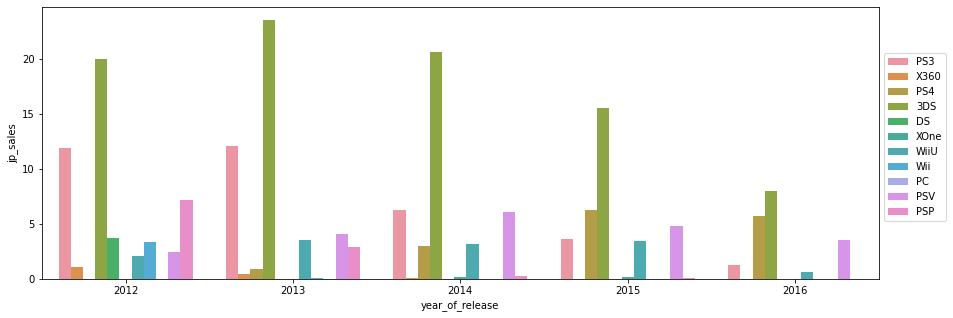

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='year_of_release', y='jp_sales', hue='platform', ci=None, estimator=sum)
plt.legend(bbox_to_anchor=(1, 0.85));

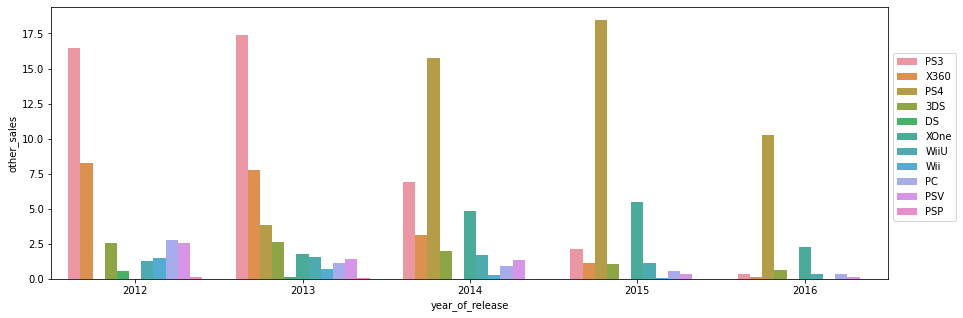

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='year_of_release', y='other_sales', hue='platform', ci=None, estimator=sum)
plt.legend(bbox_to_anchor=(1, 0.85));

Северная америка - наиболее популярные платформы - PlayStation и Xbox

Европа - наиболее популярные платформы - PlayStation и Xbox, первая значительно более популярна

Япония - наиболее популярные платформы - 3DS и PlayStation, при этом 3DS более востребована

Другие - преобладает PlayStation

### Самые популярные жанры

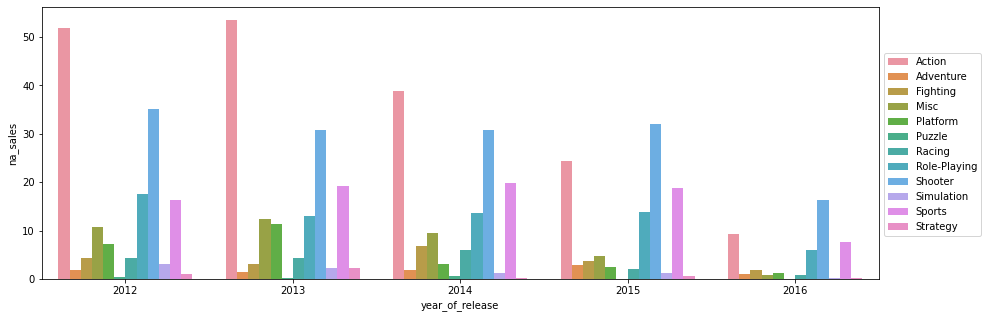

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='year_of_release', y='na_sales', hue='genre', ci=None, estimator=sum)
plt.legend(bbox_to_anchor=(1, 0.85));

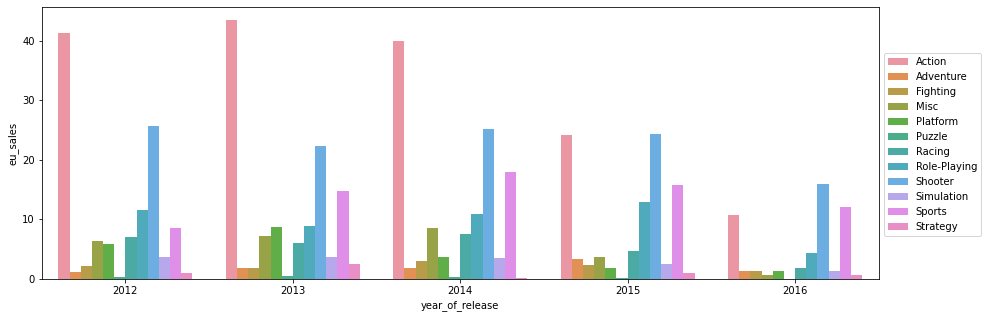

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='year_of_release', y='eu_sales', hue='genre', ci=None, estimator=sum)
plt.legend(bbox_to_anchor=(1, 0.85));

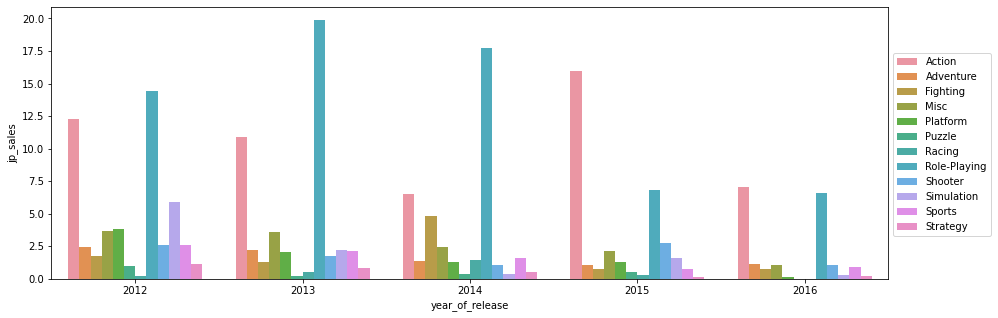

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='year_of_release', y='jp_sales', hue='genre', ci=None, estimator=sum)
plt.legend(bbox_to_anchor=(1, 0.85));

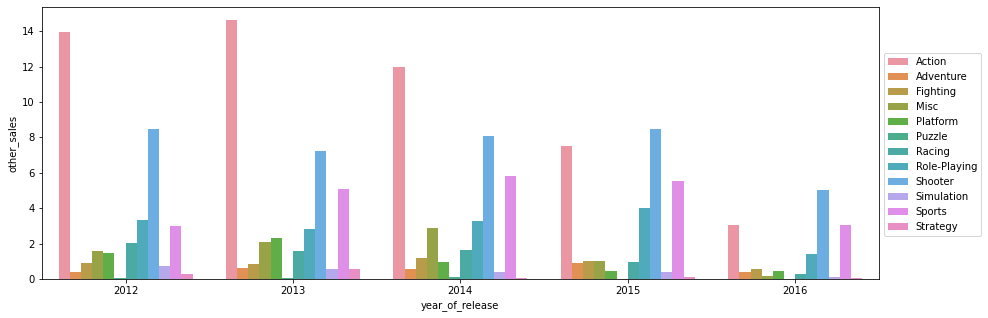

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='year_of_release', y='other_sales', hue='genre', ci=None, estimator=sum)
plt.legend(bbox_to_anchor=(1, 0.85));

Северная америка - наиболее популярные жанры - Action, Shooter, Sports. Популярность Action значительно снизилась

Европа - наиболее популярные жанры - Action, Shooter, Sports. Популярность Action значительно снизилась

Япония - наиболее популярные жанры - Action и Role-Playing

Другие - наиболее популярные жанры - Action, Shooter, Sports. Популярность Action значительно снизилась

### Влияние рейтинга ESRB

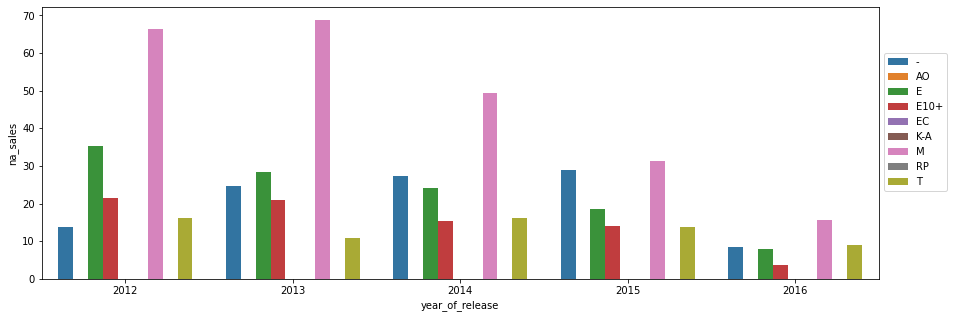

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='year_of_release', y='na_sales', \
            hue='rating', ci=None, estimator=sum)
plt.legend(bbox_to_anchor=(1, 0.85));

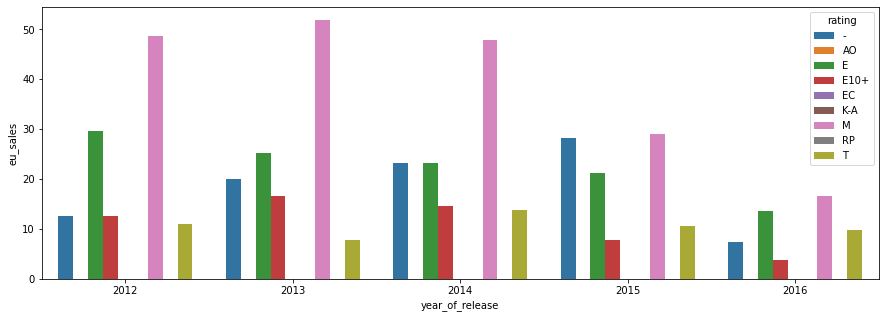

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='year_of_release', y='eu_sales', \
            hue='rating', ci=None, estimator=sum);

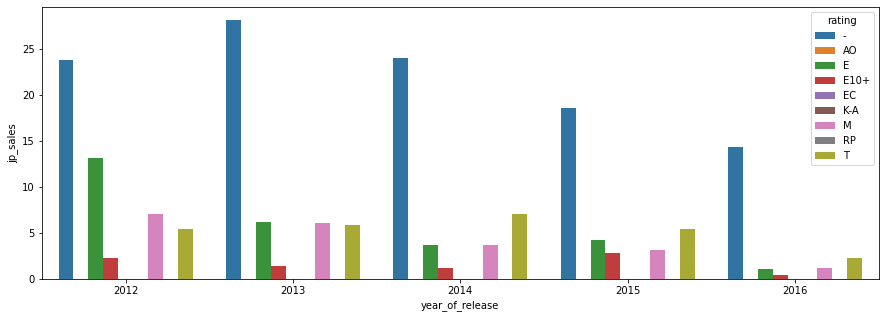

In [50]:
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='year_of_release', y='jp_sales', \
            hue='rating', ci=None, estimator=sum);

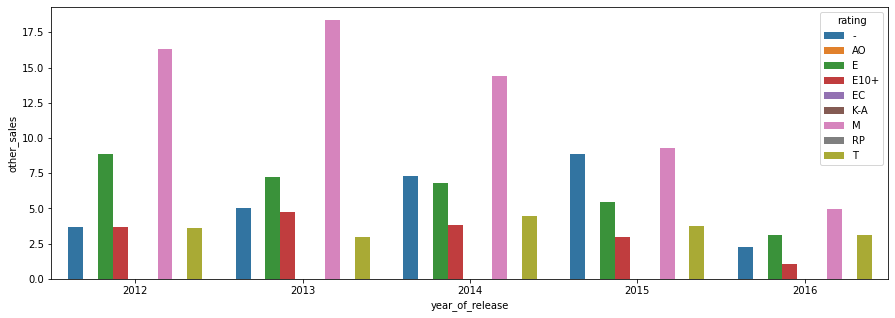

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(data=actual_data, x='year_of_release', y='other_sales', \
            hue='rating', ci=None, estimator=sum);

В японии игры с рейтингом ESRB значительно менее популярны, чем игры имеющие такой рейтинг. Вероятно в этом регионе есть своя система возрастной оценки игр, используюаяся для местных игр, которые скорее всего и имеют здесь большую популярность.

Во всех остальных регионах преобладает возрастное ограничение M(17+)

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_1: Средние пользовательские рейтинги платформ Xbox One и PC различны

Применяем ttest_ind так как с его помощью можно сравнить средние двух совокупностей.

In [52]:
results = sc.stats.ttest_ind(actual_data[(actual_data['platform'] =='XOne')&(actual_data['user_score'] != 0)]['user_score'],
                      actual_data[(actual_data['platform'] =='PC')&(actual_data['user_score'] != 0)]['user_score'],
                      equal_var=False)

alpha = .05

print(results.pvalue)
if results.pvalue>alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5065901030514671
Отвергаем нулевую гипотезу


Пользовательские оценки на платформах Xbox One и PC различны

### Средние пользовательские рейтинги жанров Action и Sports разные

H_0: Средние пользовательские рейтинги жанров Action и Sports разные

H_1: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Применяем ttest_ind так как с его помощью можно сравнить средние двух совокупностей.

In [53]:
results = sc.stats.ttest_ind(actual_data[(actual_data['genre'] =='Action')&(actual_data['user_score'] != 0)]['user_score'],
                      actual_data[(actual_data['genre'] =='Sports')&(actual_data['user_score'] != 0)]['user_score'],
                      equal_var=False)

alpha = .05

print(results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

5.989458066467418e-20
Отвергаем нулевую гипотезу


Пользовательские оценки жанров Action и Sports одинаковые

## Общий вывод

**Исследовательский анализ данных**
- До 1994 года выходило менее 100 игр в год, с 2006 по 2011 - более 1000 игр. С 2012 по 2016 год число вышедших игр снизилось почти в 2 раза.
- Лидерство в суммарных продажах в обычно длится от 3 до 6 лет. Встречаются платформы которые лидируют всего 1 год - GB и X360
- Потенциально прибыльные платформы - PS4, XOne, 3DS, PC, PSV. Playstation является наиболее востребованной платформой, поэтому PSV, пусть и не показывает высоких продаж на 2016 год будет востребована. Так же PS4 еще не потерял свою актуальность.
- Большая часть общих продаж приходится на игры с относительно небольшой выручкой, хотя самые популярные игры и имеют большой процент от общих продаж.
- С повышением оценок незначительно растет количество игр и их прибытьность.
- Среди всех игр преобладают игры без возрастного ограничения(E), и с ограничением от 17(M), 13(T) и 10(E10+) лет.
- Жанр Action имеет большее количество игр и высокий показатель общих продаж, но средняя стоимость одной игры ниже, чем в жанрах Shooter и Sports, так же имеющих высокий показатель общих продаж.


**Портрет  пользователя для регионов**
- Северная америка - наиболее популярные платформы - PlayStation и Xbox. Наиболее популярные жанры - Action, Shooter, Sports. Популярность Action значительно снизилась. Преобладает возрастное ограничение M(17+)
- Европа - наиболее популярные платформы - PlayStation и Xbox, первая значительно более популярна. Наиболее популярные жанры - Action, Shooter, Sports. Популярность Action значительно снизилась. Преобладает возрастное ограничение M(17+)
- Япония - наиболее популярные платформы - 3DS и PlayStation, при этом 3DS более востребована. Наиболее популярные жанры - Action и Role-Playing Наиболее популярные игры в регионе не имеют рейтинга ESRB.
- Другие - наиболее популярная платформа - PlayStation. наиболее популярные жанры - Action, Shooter, Sports. Популярность Action значительно снизилась. Преобладает возрастное ограничение M(17+)




**Проверка гипотез**
- Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: опровергнута.
- Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные: опровергнута.

**Вывод:**

Жанр Shooter на платформах PlayStation(PS4) и Xbox, в последние 2 года имеет наибольшую популярность повсеместно, исключая регион Япония. 

Наиболее популярны такие игры при возрастном ограничении M(17+).

Оценки критиков имеют большее влияние на продаваемость, чем пользовательские оценки, но и те и другие имеют относительно небольшое влияние - можно не обращать на них внимание.